In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import Dataset
train_pd = pd.read_csv('C:/D_drive/Leisure/Kaggle/Spaceship Titanic/spaceship-titanic/train.csv')
test_pd = pd.read_csv('C:/D_drive/Leisure/Kaggle/Spaceship Titanic/spaceship-titanic/test.csv')

In [3]:
# Print train and test data head
print(train_pd.head())
print("*"*100)
print(test_pd.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
**

In [4]:
# Basic Information of the train set
print(train_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [5]:
# Checking for non char symbols or alpha numerics
for col in train_pd.columns:
    print('{} : {}'.format(col,train_pd[col].unique()))

PassengerId : ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet : ['Europa' 'Earth' 'Mars' nan]
CryoSleep : [False True nan]
Cabin : ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination : ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Age : [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
VIP : [False True nan]
RoomService : [   0.  109.   43. ... 1569. 8586.  745.]
FoodCourt : [   0.    9. 3576. ... 3208. 6819. 4688.]
ShoppingMall : [   0.   25.  371. ... 1085.  510. 1872.]
Spa : [   0.  549. 6715. ... 2868. 1107. 1643.]
VRDeck : [   0.   44.   49. ... 1164.  971. 3235.]
Name : ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hont

<AxesSubplot:>

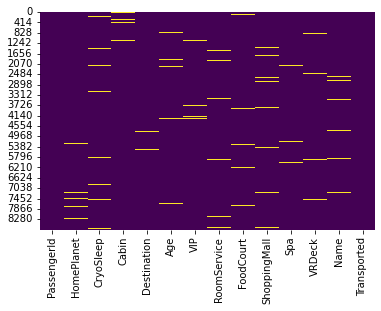

In [6]:
# Plot the missing values
sns.heatmap(train_pd.isnull(), cbar=False, cmap='viridis')

In [7]:
# We now have floating values for AGE, ROOM_SERVICE, FOOD_COURT, SHOPPING_MALL, SPA, VR_DECK
print(train_pd.columns)

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


In [8]:
# Displaying the values of the floating point values.
train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


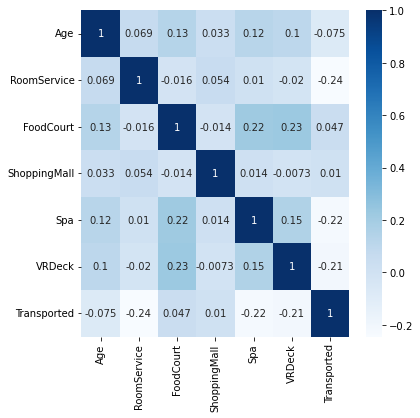

In [9]:
train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]]
plt.figure(figsize=(6,6))
cor = train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Transported"]].corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

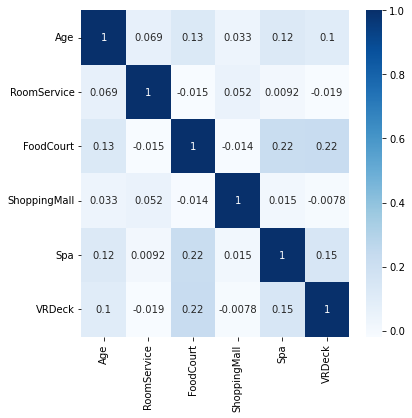

In [10]:
# train_float = train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]]
train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]] = train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].fillna(train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].median())
plt.figure(figsize=(6,6))
cor = train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].corr()
sns.heatmap(cor, annot=True, cmap='Blues')
plt.show()

<AxesSubplot:>

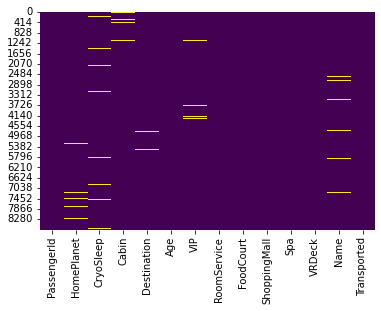

In [11]:
# Now we have median values instead of float values and now we are left with the categorical value.
sns.heatmap(train_pd.isnull(), cbar=False, cmap='viridis')

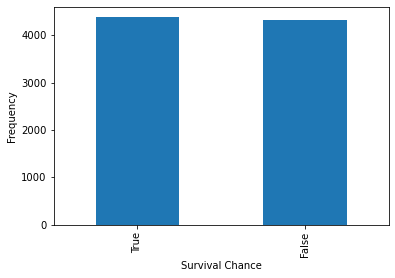

In [12]:
# Let us visualize the occurance of target values, to see if it is a balanced or unbalanced dataset.
fig, ax = plt.subplots()
train_pd['Transported'].value_counts().plot(ax=ax, kind='bar', xlabel="Survival Chance", ylabel="Frequency")
plt.show()
# Datatset is already balanaced

<Figure size 720x720 with 0 Axes>

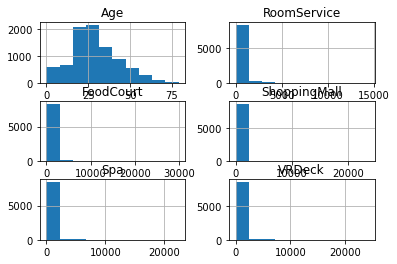

In [13]:
# fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
# sns.histplot(train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]])
train_pd[["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].hist()
plt.show()

In [14]:
# Before standardization
train_pd.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
train_pd = train_pd.drop(['Name','PassengerId','Cabin'],axis=1)

In [16]:
train_pd = train_pd.dropna()

<AxesSubplot:>

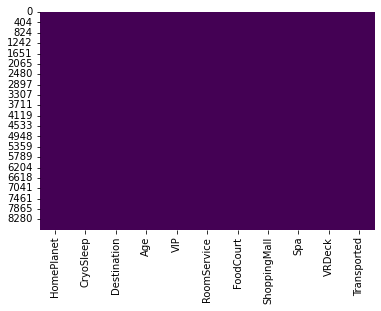

In [17]:
sns.heatmap(train_pd.isnull(), cbar=False, cmap='viridis')

In [18]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7913 non-null   object 
 1   CryoSleep     7913 non-null   object 
 2   Destination   7913 non-null   object 
 3   Age           7913 non-null   float64
 4   VIP           7913 non-null   object 
 5   RoomService   7913 non-null   float64
 6   FoodCourt     7913 non-null   float64
 7   ShoppingMall  7913 non-null   float64
 8   Spa           7913 non-null   float64
 9   VRDeck        7913 non-null   float64
 10  Transported   7913 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
le = LabelEncoder()

In [20]:
categorical_features = ["HomePlanet","CryoSleep","Destination","VIP","Transported"]
train_pd[categorical_features] = train_pd[categorical_features].apply(lambda col: le.fit_transform(col))

In [21]:
train_pd['HomePlanet'].value_counts()

0    4284
1    1996
2    1633
Name: HomePlanet, dtype: int64

In [22]:
train_pd[categorical_features]

,HomePlanet,CryoSleep,Destination,VIP,Transported
0,1,0,2,0,0
1,0,0,2,0,1
2,1,0,2,1,0
3,1,0,2,0,0
4,0,0,2,0,1
...,...,...,...,...,...
8688,1,0,0,1,0
8689,0,1,1,0,0
8690,0,0,2,0,1
8691,1,0,0,0,0


In [23]:
train_pd = pd.get_dummies(train_pd, columns = categorical_features,drop_first=True)
train_pd

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,CryoSleep_1,Destination_1,Destination_2,VIP_1,Transported_1
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,1,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,1,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,0,0,0,0,1,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,1,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pd.loc[:,train_pd.columns != "Transported_1"], train_pd['Transported_1'],test_size=0.2, random_state=42)

In [25]:
X_train,y_train,X_test,y_test

(       Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
 2068  43.0          2.0     2229.0          33.0     6.0   198.0   
 2157  49.0          9.0     2426.0          95.0  1249.0   168.0   
 2265  13.0          0.0        2.0           0.0   566.0   208.0   
 3751  38.0          0.0        0.0           0.0     0.0     0.0   
 1544  22.0       1300.0        0.0           0.0     0.0  1134.0   
 ...    ...          ...        ...           ...     ...     ...   
 5729  15.0       3811.0        0.0         109.0   236.0     0.0   
 5913  37.0          0.0        0.0           0.0     0.0     0.0   
 940   42.0       1050.0        0.0         715.0     0.0     3.0   
 8349  52.0          0.0        0.0           0.0     0.0     0.0   
 7979  40.0          0.0        0.0           0.0     0.0     0.0   
 
       HomePlanet_1  HomePlanet_2  CryoSleep_1  Destination_1  Destination_2  \
 2068             1             0            0              0              1   
 2157     

In [26]:
# standardize the floating values for train and test
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler().fit(X_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
X_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = std_scalar.transform(X_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
X_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]  = std_scalar.transform(X_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [27]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,CryoSleep_1,Destination_1,Destination_2,VIP_1
2068,0.970565,-0.333714,1.064976,-0.221545,-0.262959,-0.092289,1,0,0,0,1,0
2157,1.385958,-0.322682,1.183658,-0.124237,0.786825,-0.117963,1,0,0,0,0,0
2265,-1.106404,-0.336866,-0.276675,-0.273338,0.209993,-0.083731,0,0,0,0,1,0
3751,0.624403,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,0,0,1,0,1,0
1544,-0.483314,1.711988,-0.277880,-0.273338,-0.268027,0.708724,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5729,-0.967940,5.669427,-0.277880,-0.102264,-0.068711,-0.261734,0,1,0,0,0,0
5913,0.555171,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,1,0,0,0,1,0
940,0.901332,1.317977,-0.277880,0.848841,-0.268027,-0.259167,0,1,0,0,1,0
8349,1.593655,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,1,0,1,0,0,0


In [28]:
X_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_1,HomePlanet_2,CryoSleep_1,Destination_1,Destination_2,VIP_1
2329,0.970565,-0.336866,-0.272458,1.523718,-0.268027,-0.261734,0,0,0,0,1,0
8371,-0.275617,-0.336866,-0.277880,-0.273338,-0.262959,1.440418,0,0,0,0,1,0
4261,-0.621778,-0.297465,-0.277880,0.975969,-0.230866,-0.224080,0,0,0,0,1,0
8451,-0.483314,-0.335290,0.129375,-0.252934,-0.084758,-0.260878,0,0,0,0,1,0
3315,0.970565,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
676,1.039797,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,0,0,1,0,1,0
1554,-0.067920,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,0,0,1,0,0,0
5084,-0.691010,-0.336866,-0.277880,-0.273338,-0.268027,-0.261734,0,0,1,0,1,0
8593,0.278242,-0.336866,0.136604,-0.270199,-0.268027,0.102829,0,0,0,1,0,0


In [29]:
# Convertion to numpy for classification
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=1000)
}
gnb = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
# gnb = GaussianNB()
svc = SVC()

In [43]:
gnb.fit(X_train_np, y_train_np)


GaussianNB()

In [44]:
svc.fit(X_train_np, y_train_np)

SVC()

In [45]:
y_test_predicted_gnb = gnb.predict(X_test_np)


In [50]:
y_test_predicted_svc = svc.predict(X_test_np)

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
print(accuracy_score(y_test_np,y_test_predicted_gnb))


0.6961465571699305


In [53]:
print(accuracy_score(y_test_np,y_test_predicted_svc))

0.7978521794061908


In [54]:
confusion_matrix(y_test_np,y_test_predicted_gnb)


array([[372, 415],
       [ 66, 730]], dtype=int64)

In [55]:
confusion_matrix(y_test_np,y_test_predicted_svc)

array([[634, 153],
       [167, 629]], dtype=int64)